# INFO 4340 Data Mining and Visualization Project Presentation
Group Members: Tiger Zhang, Yue Wang, Zoe Chen

## Problem/Description
Our dataset comes from Kaggle: <https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset>. It's a fictional dataset conducted by IBM data scienctist to analysis employee attrition and performance. Employee turnover and employee salary estimation can be challenging for HR departments. With this dataset, we plan to help HR departments better manage their employees and hiring processes. \
In the first part, we wanted to provide a reasonable way to predict employee salaries. We used a Linear Regression model to predict employees' monthly earnings, explored the impact of different factors, such as age and gender, on monthly earnings, evaluate our models with visualization and MAE. In the second section, we use Generalized Linear Models to predict whether employees will leave, explore what factors contribute to employee turnover, and evaluate our model using AIC, BIC, and ROC curves.

## Code Preperation
### Import packages

In [1]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from statsmodels.compat import lzip 

# Sklearn
from sklearn import metrics # Snagging the other metrics, including MAE, MSE, and RMSE.
from sklearn.model_selection import train_test_split # For splitting the data into training/test datasets
from sklearn.metrics import mean_squared_error, r2_score # For evaluating models
from sklearn.linear_model import LogisticRegression

## Data
### Read in data

In [2]:
df =  pd.read_csv('info4340_Zhang_Chen_Wang_Project.csv')
df.head()

,Age,Attrition,DistanceFromHome,Bachelor,EnvironmentSatisfaction,Female,JobInvolvement,JobSatisfaction,Married,MonthlyIncome,NumCompaniesWorked,NumComOverAge,SalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,1,0,2,1,3,4,0,5993,8,0.22,0.11,3,1,0,0,1,6,0
1,33,0,3,1,4,1,3,3,1,2909,1,0.06,0.11,3,3,0,3,3,8,3
2,59,0,3,1,3,1,4,1,1,2670,4,0.08,0.20,4,1,3,3,2,1,0
3,29,0,15,0,4,1,2,3,0,4193,0,0.03,0.12,3,4,0,3,3,9,0
4,29,0,21,1,2,1,4,1,0,9980,1,0.07,0.11,3,3,1,1,3,10,8


### Data Information
We don't have any null value, which is good.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DistanceFromHome          1470 non-null   int64  
 3   Bachelor                  1470 non-null   int64  
 4   EnvironmentSatisfaction   1470 non-null   int64  
 5   Female                    1470 non-null   int64  
 6   JobInvolvement            1470 non-null   int64  
 7   JobSatisfaction           1470 non-null   int64  
 8   Married                   1470 non-null   int64  
 9   MonthlyIncome             1470 non-null   int64  
 10  NumCompaniesWorked        1470 non-null   int64  
 11  NumComOverAge             1470 non-null   float64
 12  SalaryHike                1470 non-null   float64
 13  PerformanceRating         1470 non-null   int64  
 14  Relation

In [4]:
df.describe()

,Age,Attrition,DistanceFromHome,Bachelor,EnvironmentSatisfaction,Female,JobInvolvement,JobSatisfaction,Married,MonthlyIncome,NumCompaniesWorked,NumComOverAge,SalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,0.692517,2.721769,0.400000,2.729932,2.728571,0.457823,6502.931293,2.693197,0.101252,0.152095,3.153741,2.712245,0.793878,2.799320,2.761224,7.008163,2.187755
std,9.135373,0.367863,8.106864,0.461608,1.093082,0.490065,0.711561,1.102846,0.498387,4707.956783,2.498009,0.067358,0.036599,0.360824,1.081209,0.852077,1.289271,0.706476,6.126525,3.222430
min,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,0.020000,0.110000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2911.000000,1.000000,0.060000,0.120000,3.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,0.000000,7.000000,1.000000,3.000000,0.000000,3.000000,3.000000,0.000000,4919.000000,2.000000,0.080000,0.140000,3.000000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,0.000000,14.000000,1.000000,4.000000,1.000000,3.000000,4.000000,1.000000,8379.000000,4.000000,0.130000,0.180000,3.000000,4.000000,1.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1.000000,29.000000,1.000000,4.000000,1.000000,4.000000,4.000000,1.000000,19999.000000,9.000000,0.420000,0.250000,4.000000,4.000000,3.000000,6.000000,4.000000,40.000000,15.000000


### Data Visulization
**Target Variable: Monthly Income** \
Monthly Income is our continuous target variable. We have a salary range from \\$1,009-19,999. The distribution is right-skewed, which means employees with higher salary impact our statistic result.

In [5]:
# Information
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

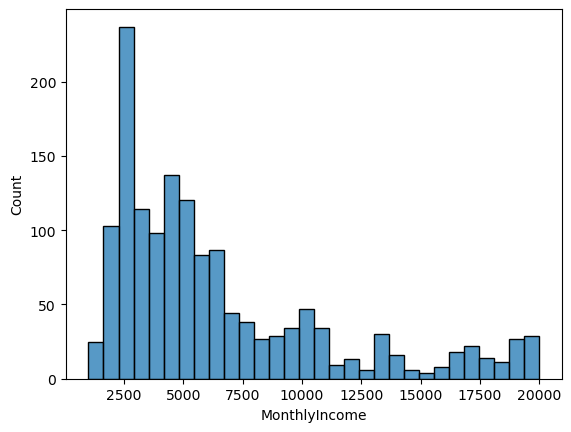

In [6]:
# Histogram
sns.histplot(data=df, x="MonthlyIncome", bins=30)

**Target Variable: Attrition** \
Attrition is our categorical target variable. It's either Yes or No, and the majority of employees in our dataset did not quit.

[Text(0, 0, '1233'), Text(0, 0, '237')]

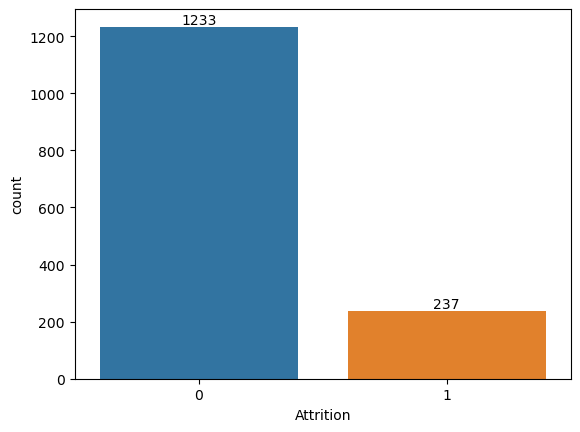

In [7]:
# Barplot
countplot = sns.countplot(data=df, x="Attrition")
countplot.bar_label(countplot.containers[0])

**Heatmap** \
From the heatmap below, we noticed there are high correlation between NumComOverAge and NumCompaniesWorked, Salary Hike and Performance Rating, YearsAtCompany and YearsSinceLastPromotion. We decide to remove SalaryHike and YearsSinceLastPromotion, and NumComOverAge vairables from our dataset for avoiding violating the multicollinearity assumtion of linear regression.

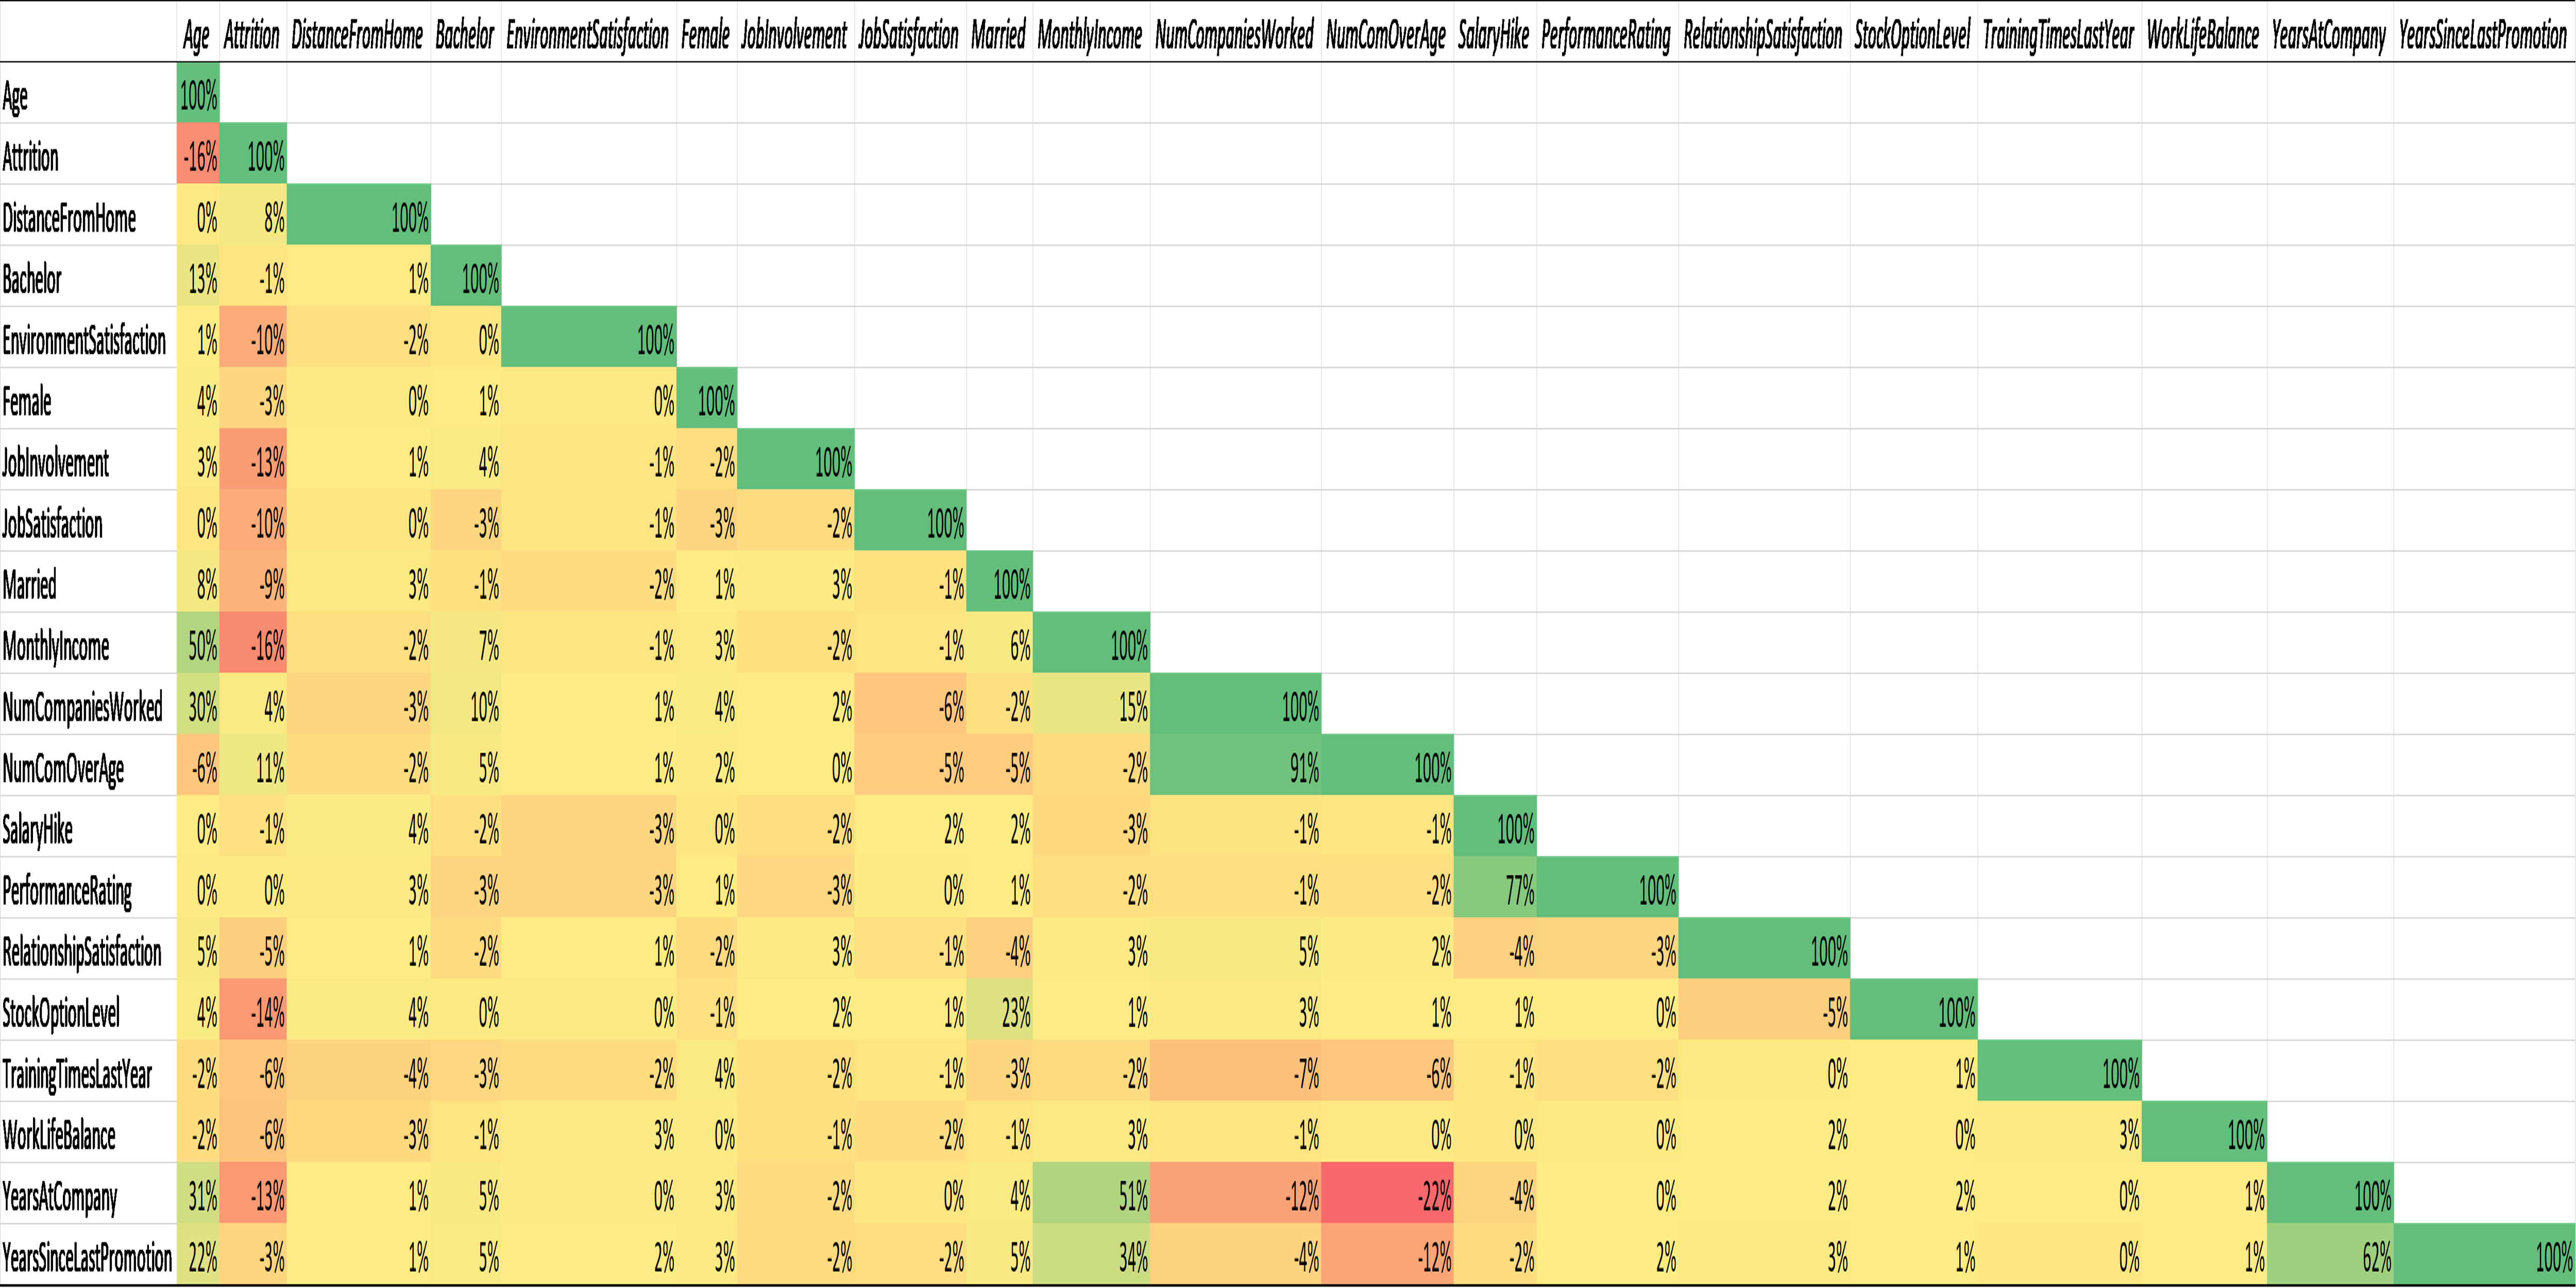

In [8]:
# Heatmap
from PIL import Image
image = Image.open('info4340_Zhang_Chen_Wang_Project.png')
new_image = image.resize((5000, 2500))
new_image

In [9]:
# Remove some variables
df_new = df.drop(columns=['SalaryHike','YearsSinceLastPromotion','NumComOverAge'])
df_new.head()

,Age,Attrition,DistanceFromHome,Bachelor,EnvironmentSatisfaction,Female,JobInvolvement,JobSatisfaction,Married,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,41,1,1,0,2,1,3,4,0,5993,8,3,1,0,0,1,6
1,33,0,3,1,4,1,3,3,1,2909,1,3,3,0,3,3,8
2,59,0,3,1,3,1,4,1,1,2670,4,4,1,3,3,2,1
3,29,0,15,0,4,1,2,3,0,4193,0,3,4,0,3,3,9
4,29,0,21,1,2,1,4,1,0,9980,1,3,3,1,1,3,10


## Analysis of Questions
### Research Questions 1: What Factors Affect Monthly Income?
**Prepare target variable and independent variables**

In [10]:
# Include all columns for explanatory variables except the outcome variable
X = df_new.drop(columns=["MonthlyIncome","Attrition"])

# Create constant (y-intercept) for the model
X = sm.add_constant(X)

# Generate our outcome (dependent) variable
y = df_new[["MonthlyIncome"]]

**Do partition**

In [11]:
# Splitting the data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 666)

In [12]:
# Check to make sure the data is the correct shape 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1102, 16) (1102, 1)
(368, 16) (368, 1)


**Fit/evaluate the model on training data**

In [13]:
# Create the model on our training data
model = sm.OLS(y_train, X_train)

# Fit the model
model_results = model.fit()

# evaluate our model
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     47.48
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          9.74e-108
Time:                        11:58:13   Log-Likelihood:                -10594.
No. Observations:                1102   AIC:                         2.122e+04
Df Residuals:                    1086   BIC:                         2.130e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Use the model to obtain predictions on the test data**

In [14]:
# Obtain our predicted values using our testing data
y_pred_train = model_results.predict(X_train)
y_pred_test = model_results.predict(X_test)

**Visualize the predicted vs. actual values**

Text(0, 0.5, 'Predicted')

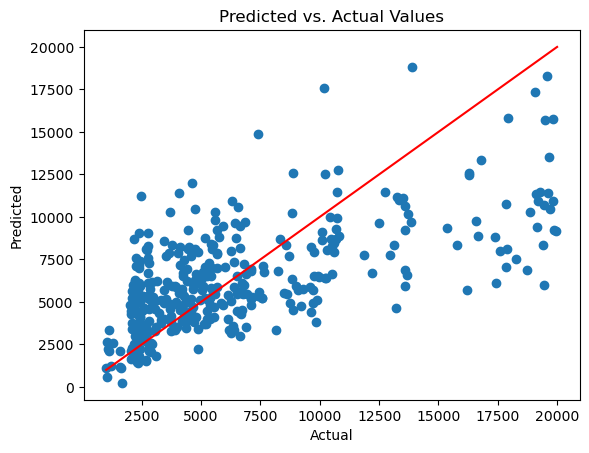

In [15]:
# Build a scatterplot
plt.scatter(y_test, y_pred_test)

# Add a line for perfect correlation
plt.plot([x for x in range(1000,20000)],[x for x in range(1000,20000)], color='red')

# Label it nicely
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

**Evaluate the model**

In [16]:
# Metrics of model performance of Training data
print('MAE Training:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE Training:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE Training:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE Training: 2674.4844248006457
MSE Training: 13113177.284752673
RMSE Training: 3621.2121292120783


In [17]:
# Metrics of model performance of Testing data
print('MAE Testing:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE Testing:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE Testing:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE Testing: 2733.5687289534176
MSE Testing: 13795948.078038346
RMSE Testing: 3714.289713799712


### Question 2: What Factors Affect An Employee's Decision of Attrition?
**Prepare target variable and independent variables**

In [18]:
X2 = df_new.drop(columns=["MonthlyIncome","Attrition"])

# Create constant (y-intercept) for the model
X2 = sm.add_constant(X2)

# Generate our outcome (dependent) variable
y2 = df_new[["Attrition"]]

**Do partition**

In [19]:
# Splitting the data into training/test sets
X2_train, X2_test, y2_train, y2_test,df_new_train,df_new_test = train_test_split(X2, y2,df_new, test_size = 0.25, random_state = 666)

In [20]:
# Check to make sure the data is the correct shape 
print(X2_train.shape, y2_train.shape,df_new_train.shape)
print(X2_test.shape, y2_test.shape,df_new_test.shape)

(1102, 16) (1102, 1) (1102, 17)
(368, 16) (368, 1) (368, 17)


**Fit/evaluate the model on training data**

In [21]:
# Create the model on our training data
model2_train = sm.GLM(y2_train, X2_train,family=sm.families.Binomial())
model2_test = sm.GLM(y2_test, X2_test,family=sm.families.Binomial())

# Fit the model
model2_train_results = model2_train.fit()

# Evaluate our model
print(model2_train_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 1102
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -420.12
Date:                Thu, 17 Nov 2022   Deviance:                       840.24
Time:                        11:58:14   Pearson chi2:                 1.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1121
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Marginal effects**

In [22]:
model2_me_train = logit("Attrition ~ Age + DistanceFromHome + Bachelor + EnvironmentSatisfaction + Female + JobInvolvement + JobSatisfaction + Married + NumCompaniesWorked + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany",df_new_train).fit()
model2_me_test = logit("Attrition ~ Age + DistanceFromHome + Bachelor + EnvironmentSatisfaction + Female + JobInvolvement + JobSatisfaction + Married + NumCompaniesWorked + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany",df_new_test).fit()

Optimization terminated successfully.
         Current function value: 0.381233
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362803
         Iterations 7


In [23]:
# Obtain our predicted probabilities
m2trainp = model2_me_train.predict()
m2testp = model2_me_test.predict()

In [24]:
# Marginal effects
model2_me_train_mfx = model2_me_train.get_margeff(at ='mean')
print(model2_me_train_mfx.summary())

        Logit Marginal Effects       
Dep. Variable:              Attrition
Method:                          dydx
At:                              mean
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0051      0.001     -4.126      0.000      -0.007      -0.003
DistanceFromHome             0.0035      0.001      3.210      0.001       0.001       0.006
Bachelor                     0.0161      0.021      0.758      0.448      -0.026       0.058
EnvironmentSatisfaction     -0.0275      0.009     -3.228      0.001      -0.044      -0.011
Female                      -0.0221      0.020     -1.131      0.258      -0.060       0.016
JobInvolvement              -0.0646      0.013     -5.071      0.000      -0.090      -0.040
JobSatisfaction             -0.0308      0.008     -3.639      0.000      -0.047      -0.014
Married    

**AIC and BIC**

In [25]:
# Other metrics of model performance
print('AIC Training:',model2_me_train.aic)
print('BIC Training:',model2_me_train.bic)
print('AIC Testing:',model2_me_test.aic)
print('BIC Testing:',model2_me_test.bic)

AIC Training: 872.2381492865533
BIC Training: 952.316261121959
AIC Testing: 299.02319118714195
BIC Testing: 361.55251819784485


**ROC curve**

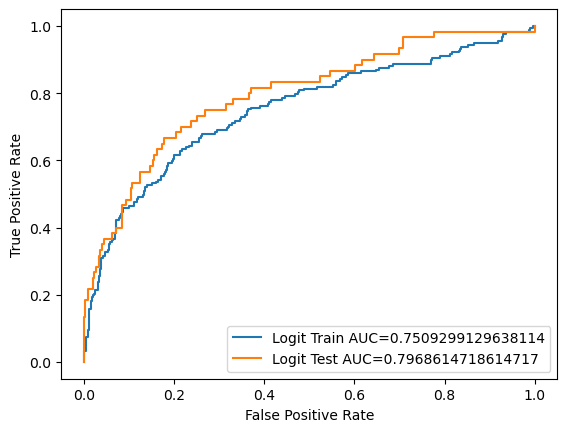

In [26]:
# Define metrics
y2_train_pred = m2trainp
fpr, tpr,_ = metrics.roc_curve(y2_train,  y2_train_pred)
auc = metrics.roc_auc_score(y2_train, y2_train_pred)

# Define metrics
y2_test_pred = m2testp
fpr2, tpr2,_ = metrics.roc_curve(y2_test,  y2_test_pred)
auc2 = metrics.roc_auc_score(y2_test, y2_test_pred)

# Create ROC curve
plt.plot(fpr,tpr,label="Logit Train AUC="+str(auc))
plt.plot(fpr2,tpr2,label="Logit Test AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Conclusion
From our model, we learned that we should compensate experienced and loyal employees because AGE, YearsAtCompany, and NumofCompaniesWorked are having a positive impact on MonthlyIncome.

The top 3 predictors for keeping employees stay at the company are JobInvolvement, StockOption, and WorkLifeBalance. Therefore, we suggest the company should focus on these three areas when it comes to retaining employees. Also, longer DistancefromHome has a negative impact on employees' chance of staying with the company. We think offering hybrid/remote options will be beneficial to improve DistanceFromHome and WorkLifeBalance.